In [57]:
def getScoreA(trunk_score, neck_score, leg_score, score_map_a):
    posture_score_a = np.ones(len(trunk_score))  # 初始化结果数组
    for n in range(len(trunk_score)):
        key = f'{int(trunk_score[n])}-{int(neck_score[n])}-{int(leg_score[n])}'
        if key in score_map_a:
            score = score_map_a[key]
        else:
            score = np.nan  # 如果没有找到匹配项，返回 NaN
        posture_score_a[n] = score
    return posture_score_a

# 定义 getScoreB 函数
def getScoreB(upper_arm_score, lower_arm_score, wrist_score, score_map_b):
    posture_score_b = np.ones(len(upper_arm_score))  # 初始化结果数组
    for n in range(len(upper_arm_score)):
        key = f'{int(upper_arm_score[n])}-{int(lower_arm_score[n])}-{int(wrist_score[n])}'
        if key in score_map_b:
            score = score_map_b[key]
        else:
            score = np.nan  # 如果没有找到匹配项，返回 NaN
        posture_score_b[n] = score
    return posture_score_b
    
# 定义 getScoreC 函数
def getScoreC(posture_score_a, posture_score_b, score_map_c):
    posture_score_c = np.ones(len(posture_score_a))  # 初始化结果数组
    for n in range(len(posture_score_a)):
        key = f'{int(posture_score_a[n])}-{int(posture_score_b[n])}'
        if key in score_map_c:
            score = score_map_c[key]
        else:
            score = np.nan  # 如果没有找到匹配项，返回 NaN
        posture_score_c[n] = score
    return posture_score_c

In [1]:
# 定义得分映射表

# POSTUREA
max_trunk_score = 5
max_neck_score = 3
max_leg_score = 4

posture_A_keys = []
posture_A_values = [
    1, 2, 3, 4, 1, 2, 3, 4, 3, 3, 5, 6,
    2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7,
    2, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8,
    3, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 9,
    4, 6, 7, 8, 6, 7, 8, 9, 7, 8, 9, 9,
]

for trunk in range(1, max_trunk_score + 1):
    for neck in range(1, max_neck_score + 1):
        for leg in range(1, max_leg_score + 1):
            key = f'{trunk}-{neck}-{leg}'
            posture_A_keys.append(key)

scoreMapA = dict(zip(posture_A_keys, posture_A_values))

# 输出 postureA 键值对
print("posture_A_keys:", posture_A_keys)
print("posture_A_values:", posture_A_values)
print("scoreMapA:", scoreMapA)


posture_A_keys: ['1-1-1', '1-1-2', '1-1-3', '1-1-4', '1-2-1', '1-2-2', '1-2-3', '1-2-4', '1-3-1', '1-3-2', '1-3-3', '1-3-4', '2-1-1', '2-1-2', '2-1-3', '2-1-4', '2-2-1', '2-2-2', '2-2-3', '2-2-4', '2-3-1', '2-3-2', '2-3-3', '2-3-4', '3-1-1', '3-1-2', '3-1-3', '3-1-4', '3-2-1', '3-2-2', '3-2-3', '3-2-4', '3-3-1', '3-3-2', '3-3-3', '3-3-4', '4-1-1', '4-1-2', '4-1-3', '4-1-4', '4-2-1', '4-2-2', '4-2-3', '4-2-4', '4-3-1', '4-3-2', '4-3-3', '4-3-4', '5-1-1', '5-1-2', '5-1-3', '5-1-4', '5-2-1', '5-2-2', '5-2-3', '5-2-4', '5-3-1', '5-3-2', '5-3-3', '5-3-4']
posture_A_values: [1, 2, 3, 4, 1, 2, 3, 4, 3, 3, 5, 6, 2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7, 2, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8, 3, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 9, 4, 6, 7, 8, 6, 7, 8, 9, 7, 8, 9, 9]
scoreMapA: {'1-1-1': 1, '1-1-2': 2, '1-1-3': 3, '1-1-4': 4, '1-2-1': 1, '1-2-2': 2, '1-2-3': 3, '1-2-4': 4, '1-3-1': 3, '1-3-2': 3, '1-3-3': 5, '1-3-4': 6, '2-1-1': 2, '2-1-2': 3, '2-1-3': 4, '2-1-4': 5, '2-2-1': 3, '2-2-2': 4, '2-2-3': 5, '2-2

In [3]:
# 定义得分映射表

# POSTUREB
max_upper_score = 6
max_lower_score = 2
max_wrist_score = 3

posture_B_keys = []
posture_B_values = [
    1, 2, 2, 1, 2, 3,
    1, 2, 3, 2, 3, 4,
    3, 4, 5, 4, 5, 5,
    4, 5, 5, 5, 6, 7,
    6, 7, 8, 7, 8, 8,
    7, 8, 8, 8, 9, 9,
]

# 生成所有可能的组合键
for upper in range(1, max_upper_score + 1):
    for lower in range(1, max_lower_score + 1):
        for wrist in range(1, max_wrist_score + 1):
            key = f'{upper}-{lower}-{wrist}'
            posture_B_keys.append(key)

# 创建映射表
scoreMapB = dict(zip(posture_B_keys, posture_B_values))

# 输出 postureB 键值对
print("posture_B_keys:", posture_B_keys)
print("posture_B_values:", posture_B_values)
print("scoreMapB:", scoreMapB)


posture_B_keys: ['1-1-1', '1-1-2', '1-1-3', '1-2-1', '1-2-2', '1-2-3', '2-1-1', '2-1-2', '2-1-3', '2-2-1', '2-2-2', '2-2-3', '3-1-1', '3-1-2', '3-1-3', '3-2-1', '3-2-2', '3-2-3', '4-1-1', '4-1-2', '4-1-3', '4-2-1', '4-2-2', '4-2-3', '5-1-1', '5-1-2', '5-1-3', '5-2-1', '5-2-2', '5-2-3', '6-1-1', '6-1-2', '6-1-3', '6-2-1', '6-2-2', '6-2-3']
posture_B_values: [1, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 5, 4, 5, 5, 5, 6, 7, 6, 7, 8, 7, 8, 8, 7, 8, 8, 8, 9, 9]
scoreMapB: {'1-1-1': 1, '1-1-2': 2, '1-1-3': 2, '1-2-1': 1, '1-2-2': 2, '1-2-3': 3, '2-1-1': 1, '2-1-2': 2, '2-1-3': 3, '2-2-1': 2, '2-2-2': 3, '2-2-3': 4, '3-1-1': 3, '3-1-2': 4, '3-1-3': 5, '3-2-1': 4, '3-2-2': 5, '3-2-3': 5, '4-1-1': 4, '4-1-2': 5, '4-1-3': 5, '4-2-1': 5, '4-2-2': 6, '4-2-3': 7, '5-1-1': 6, '5-1-2': 7, '5-1-3': 8, '5-2-1': 7, '5-2-2': 8, '5-2-3': 8, '6-1-1': 7, '6-1-2': 8, '6-1-3': 8, '6-2-1': 8, '6-2-2': 9, '6-2-3': 9}


In [5]:
# 定义得分映射表

# POSTUREC
max_postureA = 12
max_postureB = 12

posture_C_keys = []
posture_C_values = [
    1, 1, 1, 2, 3, 3, 4, 5, 6, 7, 7, 7,
    1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 7, 8,
    2, 3, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8,
    3, 4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9,
    4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9, 9,
    6, 6, 6, 7, 8, 8, 9, 9, 10, 10, 10, 10,
    7, 7, 7, 8, 9, 9, 9, 10, 10, 11, 11, 11,
    8, 8, 8, 9, 10, 10, 10, 10, 10, 11, 11, 11,
    9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12,
    10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12,
    11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
]

# 生成所有可能的组合键
for postureA in range(1, max_postureA + 1):
    for postureB in range(1, max_postureB + 1):
        key = f'{postureA}-{postureB}'
        posture_C_keys.append(key)

# 创建映射表
scoreMapC = dict(zip(posture_C_keys, posture_C_values))

# 输出 postureC 键值对
print("posture_C_keys:", posture_C_keys)
print("posture_C_values:", posture_C_values)
print("scoreMapC:", scoreMapC)


posture_C_keys: ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9', '1-10', '1-11', '1-12', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '2-8', '2-9', '2-10', '2-11', '2-12', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7', '3-8', '3-9', '3-10', '3-11', '3-12', '4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '4-8', '4-9', '4-10', '4-11', '4-12', '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', '5-11', '5-12', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '6-10', '6-11', '6-12', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6', '7-7', '7-8', '7-9', '7-10', '7-11', '7-12', '8-1', '8-2', '8-3', '8-4', '8-5', '8-6', '8-7', '8-8', '8-9', '8-10', '8-11', '8-12', '9-1', '9-2', '9-3', '9-4', '9-5', '9-6', '9-7', '9-8', '9-9', '9-10', '9-11', '9-12', '10-1', '10-2', '10-3', '10-4', '10-5', '10-6', '10-7', '10-8', '10-9', '10-10', '10-11', '10-12', '11-1', '11-2', '11-3', '11-4', '11-5', '11-6', '11-7', '11-8', '11-9', '11-10', '11-11', '11-12', '1

In [79]:
import pandas as pd

# 定义读取 .mot 文件的函数
def read_mot_file(filepath):
    with open(filepath, 'r') as file:
        # 跳过文件头部，直到找到 'endheader'
        while True:
            line = file.readline()
            if 'endheader' in line:
                break
        
        # 使用 Pandas 读取文件内容
        data = pd.read_csv(file, sep='\s+')
    
    return data

# 示例使用
filepath = r'C:\Users\阮晨东\Desktop\RULA ONLINE\RULA_TEST_DATA.mot'
mot_data = read_mot_file(filepath)
print(mot_data)


          time  pelvis_tilt  pelvis_list  pelvis_rotation  pelvis_tx  \
0     0.000000    -1.939486    -4.275176       -48.989218   0.964672   
1     0.016667    -1.060162    -3.685706       -49.141153   0.964262   
2     0.033333    -1.104816    -2.888733       -49.706581   0.963496   
3     0.050000    -1.231391    -2.579126       -49.791896   0.962762   
4     0.066667    -1.595926    -2.064413       -49.803102   0.961707   
..         ...          ...          ...              ...        ...   
879  14.650000    -2.317422     0.743005       -52.052987   0.959848   
880  14.666667    -2.273739     0.756239       -51.922299   0.959153   
881  14.683333    -2.198825     0.700481       -51.876404   0.962141   
882  14.700000    -2.123841     0.744245       -51.607902   0.962295   
883  14.716667    -2.076000     0.877847       -51.361674   0.962792   

     pelvis_ty  pelvis_tz  hip_flexion_r  hip_adduction_r  hip_rotation_r  \
0     0.938260   0.296039       0.694493         5.647838 

In [77]:
# 获取变量名称
variable_names = mot_data.columns.tolist()
num_variables = len(variable_names)
# 打印变量名称和总数
print(f"Total number of variables: {num_variables}")
print("Variable names:", variable_names)

# 将每一列数据命名为一个单独的变量
for column in mot_data.columns:
    locals()[column] = mot_data[column].values

# 测试输出部分变量
print(time[:5])  # 打印 time 列的前五个值
print(pelvis_tilt[:5])  # 打印 pelvis_tilt 列的前五个值

Total number of variables: 36
Variable names: ['time', 'pelvis_tilt', 'pelvis_list', 'pelvis_rotation', 'pelvis_tx', 'pelvis_ty', 'pelvis_tz', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'knee_angle_r_beta', 'ankle_angle_r', 'subtalar_angle_r', 'mtp_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'knee_angle_l_beta', 'ankle_angle_l', 'subtalar_angle_l', 'mtp_angle_l', 'lumbar_extension', 'lumbar_bending', 'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r', 'elbow_flex_r', 'pro_sup_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l', 'pro_sup_l']
[0.        0.0166667 0.0333333 0.05      0.0666667]
[-1.93948618 -1.06016185 -1.10481644 -1.23139053 -1.59592564]


In [27]:
import numpy as np

# 初始化 Trunk_score 数组
Trunk_score = np.zeros(len(time))

# 计算 Trunk_score
for i in range(len(time)):
    Trunk_flex_angle = lumbar_extension[i]
    Trunk_rot_angle = lumbar_rotation[i]
    Trunk_bend_angle = lumbar_bending[i]

    if -5 <= Trunk_flex_angle < 5:
        Trunk_score[i] = 1
    elif -20 <= Trunk_flex_angle < -5:
        Trunk_score[i] = 2
    elif 5 <= Trunk_flex_angle < 20:
        Trunk_score[i] = 2
    elif 20 <= Trunk_flex_angle < 60:
        Trunk_score[i] = 3
    elif Trunk_flex_angle < -20:
        Trunk_score[i] = 3
    elif Trunk_flex_angle >= 60:
        Trunk_score[i] = 4

    # Consider if the trunk is rotated
    if Trunk_rot_angle >= 10:
        Trunk_score[i] += 1
    elif Trunk_rot_angle <= -10:
        Trunk_score[i] += 1

    # Consider if the trunk is bent
    if Trunk_bend_angle >= 10:
        Trunk_score[i] += 1
    elif Trunk_bend_angle <= -10:
        Trunk_score[i] += 1

# 输出 Trunk_score 的前几个值进行验证
print(Trunk_score)


[2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [41]:
Leg_score = np.ones(len(time))

# 计算 Leg_score
for i in range(len(time)):
    Knee_flex_angle = knee_angle_r[i]

    if 30 <= Knee_flex_angle < 60:
        Leg_score[i] += 1
    elif Knee_flex_angle >= 60:
        Leg_score[i] += 2
    elif Knee_flex_angle < 30:
        Leg_score[i] = Leg_score[i]

# 输出 Leg_score 的前几个值进行验证
print(Leg_score[:5])

[1. 1. 1. 1. 1.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [33]:
Neck_score = np.ones(len(time))

In [43]:
# 假设 Trunk_score、Neck_score 和 Leg_score 已经计算完毕
Posture_Score_A = getScoreA(Trunk_score, Neck_score, Leg_score, scoreMapA)

# 输出 Posture_Score_A 的前几个值进行验证
print(Posture_Score_A[:5])
Posture_Score_A

[2. 2. 2. 2. 1.]


array([2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [51]:
# 初始化 Upper_arm_score 数组
Upper_arm_score = np.zeros(len(time))

# 计算 Upper_arm_score
for i in range(len(arm_flex_r)):
    arm_flex_angle = arm_flex_r[i]
    arm_add_angle = arm_add_r[i]
    
    if -20 <= arm_flex_angle < 20:
        Upper_arm_score[i] = 1
    elif 20 <= arm_flex_angle < 45:
        Upper_arm_score[i] = 2
    elif arm_flex_angle < -20:
        Upper_arm_score[i] = 2
    elif 45 <= arm_flex_angle < 90:
        Upper_arm_score[i] = 3
    elif arm_flex_angle >= 90:
        Upper_arm_score[i] = 4
    
    # Additional score for upper arm score
    if arm_add_angle <= -10:
        Upper_arm_score[i] += 1

# 初始化 Lower_arm_score 数组
Lower_arm_score = np.zeros(len(time))

# 计算 Lower_arm_score
for i in range(len(elbow_flex_r)):
    elbow_flex_angle = elbow_flex_r[i]

    if 60 <= elbow_flex_angle < 100:
        Lower_arm_score[i] = 1
    elif elbow_flex_angle < 60:
        Lower_arm_score[i] = 2
    elif elbow_flex_angle >= 100:
        Lower_arm_score[i] = 2

# 在此研究中，腕部处于中立位置，没有显示出偏离中立位置的情况。
Wrist_score = np.ones(len(time))



# 计算 Posture_Score_B
Posture_Score_B = getScoreB(Upper_arm_score, Lower_arm_score, Wrist_score, scoreMapB)

# 输出 Posture_Score_B 的前几个值进行验证

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [59]:
Posture_Score_C = getScoreC (Posture_Score_A, Posture_Score_B, scoreMapC)
print(Posture_Score_C)

[2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [61]:
time

array([ 0.       ,  0.0166667,  0.0333333,  0.05     ,  0.0666667,
        0.0833333,  0.1      ,  0.1166667,  0.1333333,  0.15     ,
        0.1666667,  0.1833333,  0.2      ,  0.2166667,  0.2333333,
        0.25     ,  0.2666667,  0.2833333,  0.3      ,  0.3166667,
        0.3333333,  0.35     ,  0.3666667,  0.3833333,  0.4      ,
        0.4166667,  0.4333333,  0.45     ,  0.4666667,  0.4833333,
        0.5      ,  0.5166667,  0.5333333,  0.55     ,  0.5666667,
        0.5833333,  0.6      ,  0.6166667,  0.6333333,  0.65     ,
        0.6666667,  0.6833333,  0.7      ,  0.7166667,  0.7333333,
        0.75     ,  0.7666667,  0.7833333,  0.8      ,  0.8166667,
        0.8333333,  0.85     ,  0.8666667,  0.8833333,  0.9      ,
        0.9166667,  0.9333333,  0.95     ,  0.9666667,  0.9833333,
        1.       ,  1.0166667,  1.0333333,  1.05     ,  1.0666667,
        1.0833333,  1.1      ,  1.1166667,  1.1333333,  1.15     ,
        1.1666667,  1.1833333,  1.2      ,  1.2166667,  1.2333

In [63]:
# 查找最大值
max_value = np.nanmax(Posture_Score_C)

# 找到所有最大值的索引
max_indices = np.where(Posture_Score_C == max_value)[0]

# 输出最大值和对应的索引
print("Maximum value:", max_value)
print("Indices of maximum value:", max_indices)

Maximum value: 5.0
Indices of maximum value: [570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587
 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605
 606 607 608 609 610 611 612]


In [67]:
import matplotlib.pyplot as plt

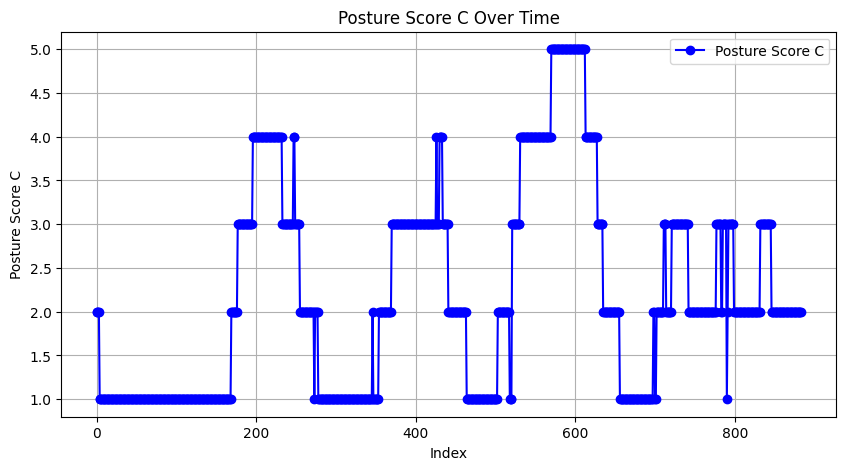

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(Posture_Score_C, marker='o', linestyle='-', color='b', label='Posture Score C')
plt.xlabel('Index')
plt.ylabel('Posture Score C')
plt.title('Posture Score C Over Time')
plt.legend()
plt.grid(True)
plt.show()